# Фреймворк PyTorch для разработки искусственных нейронных сетей
# Урок 6. Нейросети в обработке текста

# <font color='red'>Практическое задание</font>

# Text classification using CNN

## Задача (Sentiment Analysis)

Работаем по методичке (Lecture06.jpynb)

In [1]:
max_words = 2000
max_len = 40
num_classes = 1

# Training
epochs = 20
batch_size = 512
print_batch_n = 100

In [2]:
import pandas as pd

In [3]:
PATH_DATA = '.\\data\\'
df = pd.read_excel(PATH_DATA + "отзывы за лето.xls")
print(df.shape, '\n')
df.info()
df.head()

(20659, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20659 entries, 0 to 20658
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   20659 non-null  int64 
 1   Content  20656 non-null  object
 2   Date     20659 non-null  object
dtypes: int64(1), object(2)
memory usage: 484.3+ KB


,Rating,Content,Date
0,5,It just works!,2017-08-14
1,4,В целом удобноное приложение...из минусов хотя...,2017-08-14
2,5,Отлично все,2017-08-14
3,5,Стал зависать на 1% работы антивируса. Дальше ...,2017-08-14
4,5,"Очень удобно, работает быстро.",2017-08-14


In [4]:
df.columns

Index(['Rating', 'Content', 'Date'], dtype='object')

In [5]:
# выводим уникальные значения рейтинга

df.Rating.unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [6]:
df = df.drop(['Date'], axis='columns')

Разделим данные на trin, test и val

In [7]:
test_dt_size = 1000
test_dt_val_size = 5000

df_train = df[:-test_dt_size]
df_test = df[-test_dt_size:]
df_val = df[-test_dt_val_size:]

In [8]:
df_train.head(3)

,Rating,Content
0,5,It just works!
1,4,В целом удобноное приложение...из минусов хотя...
2,5,Отлично все


In [9]:
df_test.head(3)

,Rating,Content
19659,4,"Дизайн неудобен и некрасив, режет глаз, все ра..."
19660,5,"Быстро, качественно и удобно."
19661,1,"Поганое приложение, постоянно само запускается..."


In [10]:
df_val.head(3)

,Rating,Content
15659,5,Всё вроде норм
15660,3,Урезано в равнении с версией в браузере
15661,5,Все работает очень быстро и удобно мне нравится!


### Предобработка

In [11]:
from string import punctuation
from stop_words import get_stop_words
from pymorphy2 import MorphAnalyzer
import re

In [12]:
sw = set(get_stop_words("ru"))
exclude = set(punctuation)
morpher = MorphAnalyzer()

def preprocess_text(txt):
    txt = str(txt)
    txt = "".join(c for c in txt if c not in exclude)
    txt = txt.lower()
    txt = re.sub("\sне", "не", txt)
    txt = [morpher.parse(word)[0].normal_form for word in txt.split() if word not in sw]
    return " ".join(txt)

df_train['Content'] = df_train['Content'].apply(preprocess_text)

<ipython-input-12-49ea34e9bc8c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Content'] = df_train['Content'].apply(preprocess_text)


In [13]:
train_corpus = " ".join(df_train["Content"])
train_corpus = train_corpus.lower()

In [14]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

tokens = word_tokenize(train_corpus)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
tokens = word_tokenize(train_corpus)

Отфильтруем данные 

и соберём в корпус N наиболее частых токенов

In [16]:
tokens_filtered = [word for word in tokens if word.isalnum()]

In [17]:
from nltk.probability import FreqDist
dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]

In [18]:
tokens_filtered_top[10:]

['быстро',
 'пароль',
 'мочь',
 'банк',
 'пользоваться',
 'антивирус',
 'обновление',
 'устраивать',
 'сбербанк',
 'вход',
 'раз',
 'карта',
 'прошивка',
 'проблема',
 'счёт',
 'рута',
 'программа',
 'сделать',
 'разработчик',
 'перевод',
 'писать',
 'норма',
 'приходиться',
 'деньга',
 'вводить',
 'ошибка',
 'нормально',
 'платёж',
 'около',
 'постоянно',
 'довольный',
 'исправить',
 'понятно',
 'код',
 'смс',
 'вылетать',
 'свой',
 'шаблон',
 'функция',
 'мобильный',
 'возможность',
 'зайти',
 'стать',
 'класс',
 'право',
 'приходить',
 'установить',
 'делать',
 'иня',
 'root',
 'последний',
 'заходить',
 'проверка',
 'работа',
 'операция',
 'оплата',
 'ввод',
 'нужный',
 'meizu',
 '5',
 'мой',
 'онлайн',
 'функционал',
 'войти',
 'удалить',
 'молодец',
 'версия',
 'доступ',
 'первый',
 'один',
 'номер',
 '2',
 'новый',
 'полный',
 'круто',
 'приложениен',
 'интернет',
 'самый',
 'отпечаток',
 'вообще',
 'уведомление',
 'какой',
 'изз',
 'клиент',
 'рука',
 'просить',
 'перестать',
 

In [19]:
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}

In [20]:
import numpy as np
def text_to_sequence(text, maxlen):
    result = []
    tokens = word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])
    padding = [0]*(maxlen-len(result))
    return padding + result[-maxlen:]

In [21]:
x_train = np.asarray([text_to_sequence(text, max_len) for text in df_train["Content"]], dtype=np.int32)
x_test = np.asarray([text_to_sequence(text, max_len) for text in df_test["Content"]], dtype=np.int32)
x_val = np.asarray([text_to_sequence(text, max_len) for text in df_val["Content"]], dtype=np.int32)

In [22]:
x_train.shape

(19659, 40)

In [23]:
x_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  104,  126,  170,
        111,   78, 1370,  411,   15,  609,  441])

In [24]:
import random
import torch
import torch.nn as nn

seed = 0

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [25]:
class Net(nn.Module):
    def __init__(self, vocab_size=20, embedding_dim = 128, out_channel = 128, num_classes = 1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv = nn.Conv1d(embedding_dim, out_channel, kernel_size=3)
        self.relu = nn.ReLU()
        self.linear = nn.Linear(out_channel, num_classes)
        
    def forward(self, x):        
        output = self.embedding(x)
        #                       B  F  L         
        output = output.permute(0, 2, 1)
        output = self.conv(output)
        output = self.relu(output)
        output = torch.max(output, axis=2).values
        output = self.linear(output)
        
        return output

In [26]:
from torch.utils.data import DataLoader, Dataset

class DataWrapper(Dataset):
    def __init__(self, data, target=None, transform=None):
        self.data = torch.from_numpy(data).long()
        if target is not None:
            self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index] if self.target is not None else None
        
        if self.transform:
            x = self.transform(x)
            
        return x, y
    
    def __len__(self):
        return len(self.data)

In [27]:
model = Net(vocab_size=max_words)

print(model)
print("Parameters:", sum([param.nelement() for param in model.parameters()]))

model.train()
#model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=10e-3)
criterion = nn.BCEWithLogitsLoss()

    
train_dataset = DataWrapper(x_train, df_train['Rating'].values)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = DataWrapper(x_val, df_val['Rating'].values)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

loss_history = []

for epoch in range(1, epochs + 1):
    print(f"Train epoch {epoch}/{epochs}")
    for i, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        # data = data.cuda()
        # target = target.cuda()
        
        # compute output
        output = model(data)
        
        # compute gradient and do SGD step
        loss = criterion(output, target.float().view(-1, 1))
        loss.backward()
        
        optimizer.step()
        
        if i%print_batch_n == 0:
            loss = loss.float().item()
            print("Step {}: loss={}".format(i, loss))
            loss_history.append(loss)

Net(
  (embedding): Embedding(2000, 128)
  (conv): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (linear): Linear(in_features=128, out_features=1, bias=True)
)
Parameters: 305409
Train epoch 1/20
Step 0: loss=-1.6998882293701172
Train epoch 2/20
Step 0: loss=-26912.890625
Train epoch 3/20
Step 0: loss=-265666.15625
Train epoch 4/20
Step 0: loss=-1153712.5
Train epoch 5/20
Step 0: loss=-3214220.25
Train epoch 6/20
Step 0: loss=-6851678.0
Train epoch 7/20
Step 0: loss=-12969374.0
Train epoch 8/20
Step 0: loss=-22007086.0
Train epoch 9/20
Step 0: loss=-32805878.0
Train epoch 10/20
Step 0: loss=-46847064.0
Train epoch 11/20
Step 0: loss=-69649096.0
Train epoch 12/20
Step 0: loss=-89202800.0
Train epoch 13/20
Step 0: loss=-121019288.0
Train epoch 14/20
Step 0: loss=-155820464.0
Train epoch 15/20
Step 0: loss=-191131008.0
Train epoch 16/20
Step 0: loss=-234939648.0
Train epoch 17/20
Step 0: loss=-287445760.0
Train epoch 18/20
Step 0: loss=-367297216.0
Train epoch 19/20
S

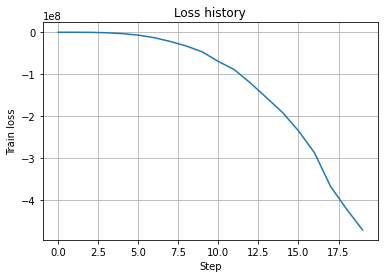

In [28]:
import matplotlib.pyplot as plt

plt.title('Loss history')
plt.grid(True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.plot(loss_history);

In [29]:
test_dataset = DataWrapper(x_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)